In [8]:
from TransportModel import TransportModel
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
model = TransportModel(2, 1, 10, 10)
for i in range(100):
    model.step()

Agent 1: Location(x=4, y=4) to Location(x=6, y=2)
Agent 2: Location(x=9, y=9) to Location(x=4, y=0)
Destination Reached
Destination Reached
Waiting for new client
Waited too long - passenger 2 has left
Destination Reached
Waiting for new client
Agent 5: Location(x=7, y=4) to Location(x=4, y=5)
Destination Reached
Destination Reached
Waiting for new client
Destination Reached
Waiting for new client
Destination Reached
Waiting for new client
Agent 7: Location(x=3, y=3) to Location(x=0, y=0)
Destination Reached
Destination Reached
Waiting for new client
Agent 9: Location(x=1, y=9) to Location(x=7, y=8)
Agent 10: Location(x=7, y=5) to Location(x=9, y=9)
Destination Reached
Destination Reached
Agent 12: Location(x=2, y=0) to Location(x=0, y=9)
Destination Reached
Destination Reached
Waiting for new client
Destination Reached
Waiting for new client
Destination Reached
Waiting for new client
Destination Reached
Waiting for new client
Agent 14: Location(x=3, y=6) to Location(x=7, y=6)
Waited t

<AxesSubplot: xlabel='Step,AgentID'>

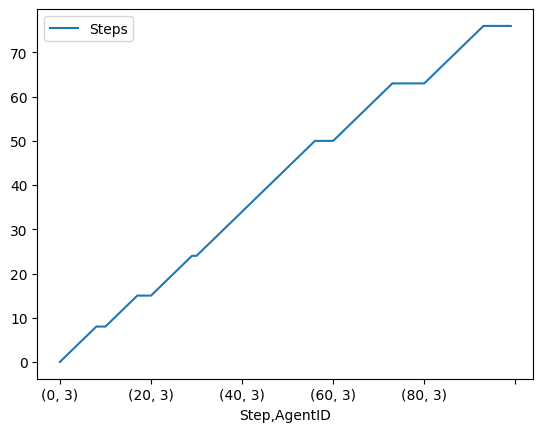

In [75]:
steps = model.datacollector.get_agent_vars_dataframe()
steps = steps.dropna()
steps.head()
steps.plot()
